<a href="https://colab.research.google.com/github/arihantjain22/The-Sparks-Foundation/blob/main/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/^BSESN.csv")

In [5]:
data.head()

Date         Open         High  ...        Close    Adj Close  Volume
0  1997-07-01  4263.109863  4301.770020  ...  4300.859863  4300.859863     0.0
1  1997-07-02  4302.959961  4395.310059  ...  4333.899902  4333.899902     0.0
2  1997-07-03  4335.790039  4393.290039  ...  4323.459961  4323.459961     0.0
3  1997-07-04  4332.700195  4347.589844  ...  4323.819824  4323.819824     0.0
4  1997-07-07  4326.810059  4391.009766  ...  4291.450195  4291.450195     0.0

[5 rows x 7 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5916 non-null   object 
 1   Open       5786 non-null   float64
 2   High       5786 non-null   float64
 3   Low        5786 non-null   float64
 4   Close      5786 non-null   float64
 5   Adj Close  5786 non-null   float64
 6   Volume     5786 non-null   float64
dtypes: float64(6), object(1)
memory usage: 323.7+ KB


In [7]:
data['Date'] = pd.to_datetime(data.Date, infer_datetime_format=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5916 non-null   datetime64[ns]
 1   Open       5786 non-null   float64       
 2   High       5786 non-null   float64       
 3   Low        5786 non-null   float64       
 4   Close      5786 non-null   float64       
 5   Adj Close  5786 non-null   float64       
 6   Volume     5786 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 323.7 KB


In [9]:
data.isna().sum()

Date           0
Open         130
High         130
Low          130
Close        130
Adj Close    130
Volume       130
dtype: int64

In [10]:
data.dropna(axis=0,inplace=True)

In [11]:
data = data[data.Volume !=0]

In [12]:
data.shape

(4296, 7)

In [13]:
data.head()

Date         Open         High  ...        Close    Adj Close   Volume
1574 2003-07-14  3704.629883  3726.560059  ...  3720.750000  3720.750000  21200.0
1575 2003-07-15  3719.169922  3733.879883  ...  3686.340088  3686.340088  22800.0
1576 2003-07-16  3702.139893  3729.020020  ...  3721.649902  3721.649902  18400.0
1577 2003-07-17  3728.840088  3750.000000  ...  3668.909912  3668.909912  22000.0
1578 2003-07-18  3651.389893  3684.229980  ...  3647.580078  3647.580078  22000.0

[5 rows x 7 columns]

**Rolling window analysis of time series**\
Creating 4,16, 52 week moving average of closing price of BSE index

In [14]:
def stock_weekmovingavg(wks, df):
  dateclose_data = pd.DataFrame({'date': df['Date'], 'close':df['Close']})
  dateclose_data.set_index('date', inplace=True)
  num = wks * 5                                 #calculating the number of days in the week. 5 days because BSE is open for 5 days / week
  dateclose_data['movingavg'] = dateclose_data['close'].rolling(window=num).mean().shift()
  return dateclose_data.dropna()

In [15]:
stock_weekmovingavg(4, data).head()

close    movingavg
date                                
2003-08-11  3893.409912  3723.223498
2003-08-12  3889.409912  3731.856494
2003-08-13  3926.070068  3742.009985
2003-08-14  3921.199951  3752.230994
2003-08-18  3977.729980  3764.845496

In [16]:
stock_weekmovingavg(4, data).tail()

close     movingavg
date                                  
2020-12-29  47613.078125  45884.975781
2020-12-30  47746.218750  46058.143750
2020-12-31  47751.328125  46212.682617
2021-01-04  48176.800781  46369.347070
2021-01-05  48437.781250  46546.554688

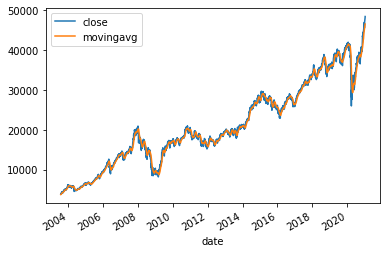

In [17]:
stock_weekmovingavg(4, data).plot()

In [18]:
altdata_fourweek = stock_weekmovingavg(4, data)
altdata_fourweek.head()

close    movingavg
date                                
2003-08-11  3893.409912  3723.223498
2003-08-12  3889.409912  3731.856494
2003-08-13  3926.070068  3742.009985
2003-08-14  3921.199951  3752.230994
2003-08-18  3977.729980  3764.845496

In [19]:
altdata_fourweek.reset_index(inplace=True)
altdata_fourweek.head()

date        close    movingavg
0 2003-08-11  3893.409912  3723.223498
1 2003-08-12  3889.409912  3731.856494
2 2003-08-13  3926.070068  3742.009985
3 2003-08-14  3921.199951  3752.230994
4 2003-08-18  3977.729980  3764.845496

In [20]:
alt.Chart(altdata_fourweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

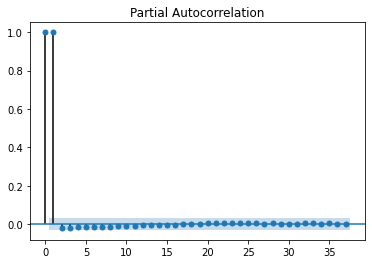

In [21]:
plotfourweek = altdata_fourweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotfourweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_fourweek['date']))) 
del plotfourweek['date']
sm.graphics.tsa.plot_pacf(plotfourweek.values.squeeze())     #squeeze used to make it a Series
plt.show()

In [22]:
stock_weekmovingavg(16, data).head()

close    movingavg
date                                
2003-11-05  5064.910156  4256.651736
2003-11-06  5047.540039  4273.453738
2003-11-07  4971.569824  4290.468738
2003-11-10  4998.569824  4306.092737
2003-11-11  5030.640137  4322.713486

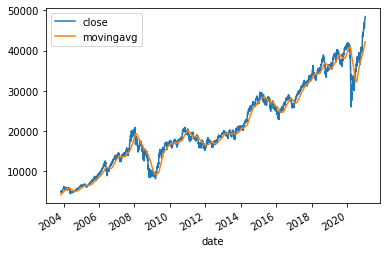

In [23]:
stock_weekmovingavg(16, data).plot()
plt.show()

In [24]:
altdata_sixteenweek = stock_weekmovingavg(16, data)
altdata_sixteenweek.reset_index(inplace=True)
altdata_sixteenweek.rename(columns={list(altdata_sixteenweek)[0]:'date'}, inplace=True)

In [25]:
alt.Chart(altdata_sixteenweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

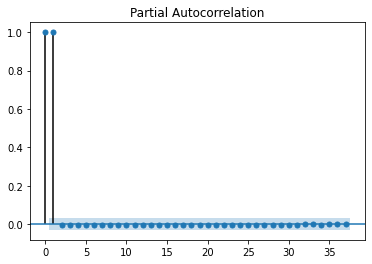

In [26]:
plotsixteenweek = altdata_sixteenweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotsixteenweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_sixteenweek['date']))) 
del plotsixteenweek['date']
sm.graphics.tsa.plot_pacf(plotsixteenweek.values.squeeze())
plt.show()

In [27]:
stock_weekmovingavg(52, data).head()

close    movingavg
date                                
2004-07-27  5075.879883  5045.560377
2004-07-28  5070.290039  5050.772415
2004-07-29  5120.450195  5056.095299
2004-07-30  5170.319824  5061.475300
2004-08-02  5202.529785  5067.249954

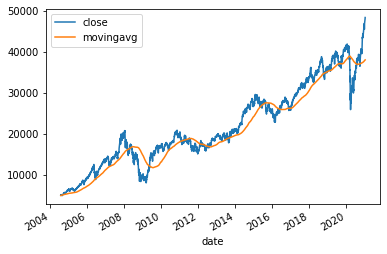

In [28]:
stock_weekmovingavg(52, data).plot()
plt.show()

In [29]:
altdata_fiftytwoweek = stock_weekmovingavg(52, data)
altdata_fiftytwoweek.reset_index(inplace=True)
altdata_fiftytwoweek.rename(columns={list(altdata_fiftytwoweek)[0]:'date'}, inplace=True)

In [30]:
alt.Chart(altdata_fiftytwoweek).mark_point().encode(
    x='date',
    y='movingavg'
)

alt.Chart(...)

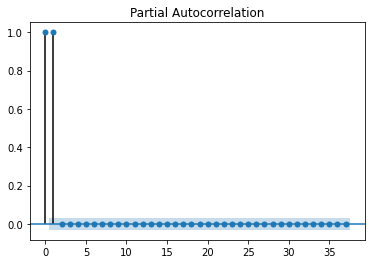

In [31]:
plotfiftytwoweek = altdata_fiftytwoweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotfiftytwoweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_fiftytwoweek['date']))) 
del plotfiftytwoweek['date']
sm.graphics.tsa.plot_pacf(plotfiftytwoweek.values.squeeze())
plt.show()

**Creating a rolling window of size 10 and 50 of the BSE index**

In [32]:
def rollingwindows(days, df):
  data = df.filter(['Date','Open','High','Low','Close'], axis=1) #df.copy()
  data.set_index('Date', inplace=True)
  rollingwindows_data = data.rolling(window=days).mean().shift()
  return rollingwindows_data.dropna()

In [33]:
rollingwindows(10, data).head()

Open         High          Low        Close
Date                                                          
2003-07-28  3657.121973  3688.200000  3619.535962  3654.135986
2003-07-29  3661.257984  3693.108984  3622.079980  3656.036987
2003-07-30  3662.526001  3696.856006  3625.855981  3663.846973
2003-07-31  3668.488013  3703.942993  3635.583984  3669.723975
2003-08-01  3675.257007  3712.517993  3648.061987  3682.093994

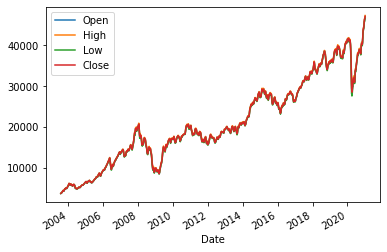

In [34]:
rollingwindows(10, data).plot()

In [35]:
altdata_tendays = rollingwindows(10, data)
altdata_tendays.reset_index(inplace=True)
altdata_tendays.rename(columns={list(altdata_tendays)[0]:'date'}, inplace=True)

In [36]:
alt.Chart(altdata_tendays).mark_point().encode(
    x ='date',
    y = 'Close'
)

alt.Chart(...)

In [37]:
rollingwindows(50, data).head()

Open         High          Low        Close
Date                                                          
2003-09-23  4001.156992  4038.988789  3960.833374  3999.541196
2003-09-24  4009.824590  4049.257988  3968.971577  4009.759995
2003-09-25  4020.439795  4061.916992  3980.425381  4023.160996
2003-09-26  4033.341597  4074.550996  3992.871577  4034.670996
2003-09-29  4044.757998  4087.327598  4005.657978  4048.944194

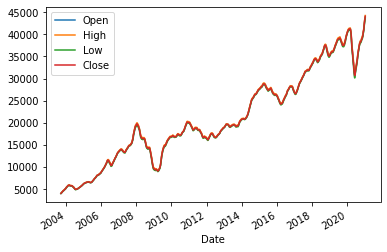

In [38]:
rollingwindows(50, data).plot()
plt.show()

In [39]:
altdata_fiftydays = rollingwindows(50,data)
altdata_fiftydays.reset_index(inplace=True)
altdata_fiftydays.rename(columns={list(altdata_fiftydays)[0]:'date'}, inplace=True)

In [40]:
alt.Chart(altdata_fiftydays).mark_point().encode(
    x='date',
    y='Close'
)

alt.Chart(...)

**Creating the dummy time series:**\
Volume shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether volume traded is 10% higher/lower than previous day. ( 0/1 dummy-coding is for direction of shock)

In [41]:
def boolean_shock(percent, df, col):
  data = df.filter(['Date', col], axis=1) #df.copy()
  data.set_index('Date', inplace=True)
  data['percentchg'] = (data[col].pct_change()) * 100  #percentage change compare to previous volume using pct_change() function
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(col, axis = 1, inplace = True)
  return data.dropna()

In [42]:
boolean_shock(10, data, 'Volume')

percentchg  shock
Date                         
2003-07-15    7.547170      0
2003-07-16  -19.298246      0
2003-07-17   19.565217      1
2003-07-18    0.000000      0
2003-07-21  -11.818182      0
...                ...    ...
2020-12-29   33.333333      1
2020-12-30   21.875000      1
2020-12-31  -10.897436      0
2021-01-04    0.000000      0
2021-01-05  -12.230216      0

[4295 rows x 2 columns]

In [43]:
altdata_volpercentchg = boolean_shock(10, data, 'Volume')
altdata_volpercentchg.reset_index(inplace=True)
altdata_volpercentchg.rename(columns={list(altdata_volpercentchg)[0]:'date'}, inplace=True)

In [44]:
alt.Chart(altdata_volpercentchg).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

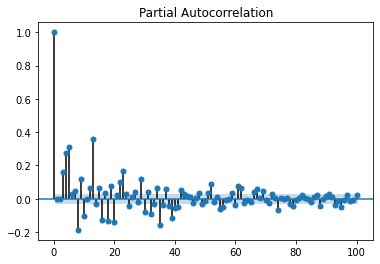

In [45]:
plotvolpercentchg = altdata_volpercentchg.filter(['date', 'percentchg'], axis=1) #df.copy()
plotvolpercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_volpercentchg['date']))) 
del plotvolpercentchg['date']
sm.graphics.tsa.plot_pacf(plotvolpercentchg.values.squeeze(),lags=100)
plt.show()

In [46]:
boolean_shock(2, data, 'Close')

percentchg  shock
Date                         
2003-07-15   -0.924811      0
2003-07-16    0.957856      0
2003-07-17   -1.417113      0
2003-07-18   -0.581367      0
2003-07-21   -2.138404      0
...                ...    ...
2020-12-29    0.547640      0
2020-12-30    0.279630      0
2020-12-31    0.010701      0
2021-01-04    0.891017      0
2021-01-05    0.541714      0

[4295 rows x 2 columns]

In [47]:
altdata_closepercentchg2 = boolean_shock(2, data, 'Close')
altdata_closepercentchg2.reset_index(inplace=True)
altdata_closepercentchg2.rename(columns={list(altdata_closepercentchg2)[0]:'date'}, inplace=True)

In [48]:
alt.Chart(altdata_closepercentchg2).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

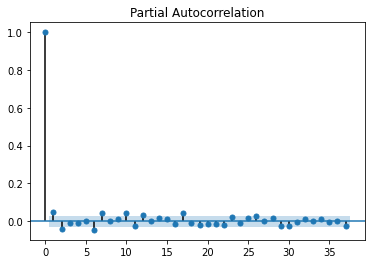

In [49]:
plotclosepercentchg2 = altdata_closepercentchg2.filter(['date', 'percentchg'], axis=1) #df.copy()
plotclosepercentchg2.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_closepercentchg2['date']))) 
del plotclosepercentchg2['date']
sm.graphics.tsa.plot_pacf(plotclosepercentchg2.values.squeeze())
plt.show()

In [50]:
boolean_shock(10, data, 'Close')

percentchg  shock
Date                         
2003-07-15   -0.924811      0
2003-07-16    0.957856      0
2003-07-17   -1.417113      0
2003-07-18   -0.581367      0
2003-07-21   -2.138404      0
...                ...    ...
2020-12-29    0.547640      0
2020-12-30    0.279630      0
2020-12-31    0.010701      0
2021-01-04    0.891017      0
2021-01-05    0.541714      0

[4295 rows x 2 columns]

In [51]:
altdata_closepercentchg10 = boolean_shock(10, data, 'Close')
altdata_closepercentchg10.reset_index(inplace=True)
altdata_closepercentchg10.rename(columns={list(altdata_closepercentchg10)[0]:'date'}, inplace=True)


In [52]:
alt.Chart(altdata_closepercentchg10).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

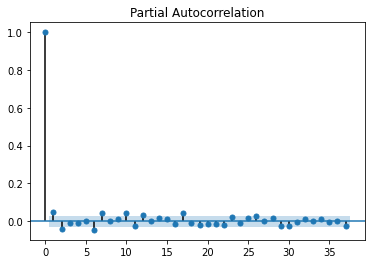

In [53]:
plotclosepercentchg10 = altdata_closepercentchg10.filter(['date', 'percentchg'], axis=1) #df.copy()
plotclosepercentchg10.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_closepercentchg10['date']))) 
del plotclosepercentchg10['date']
sm.graphics.tsa.plot_pacf(plotclosepercentchg10.values.squeeze())
plt.show()


**Pricing shock without volume shock**

In [54]:
def priceboolean_shock(percent, df):
  df['date'] = pd.to_datetime(df['Date'])
  data = df.filter(['Date', 'High', 'Low','Close'], axis=1) #df.copy()
  data.set_index('Date', inplace=True)
  data['priceavg'] = (data['High'] + data['Low'] + data['Close']) / 3
  data['shock'] = (data['priceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['High', 'Low', 'Close'], axis = 1, inplace = True)
  return data

In [55]:
priceboolean_shock(10, data)

priceavg  shock
Date                           
2003-07-14   3717.313314      0
2003-07-15   3692.466634      0
2003-07-16   3704.456624      0
2003-07-17   3693.083333      0
2003-07-18   3652.513346      0
...                  ...    ...
2020-12-29  47563.175781      0
2020-12-30  47637.476563      0
2020-12-31  47750.139323      0
2021-01-04  47997.246094      0
2021-01-05  48275.799479      0

[4296 rows x 2 columns]

In [56]:
altdata_pricepercentchg = priceboolean_shock(10, data)
altdata_pricepercentchg.reset_index(inplace=True)
altdata_pricepercentchg.rename(columns={list(altdata_pricepercentchg)[0]:'date'}, inplace=True)


In [57]:
alt.Chart(altdata_pricepercentchg).mark_point().encode(
    x='date',
    y='priceavg'
)

alt.Chart(...)

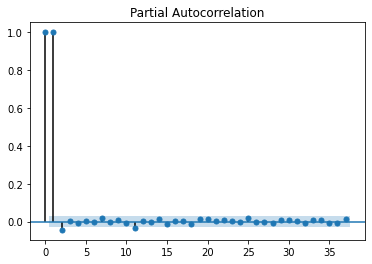

In [58]:
plotpricepercentchg = altdata_pricepercentchg.filter(['date', 'priceavg'], axis=1) #df.copy()
plotpricepercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2003', length=len(altdata_pricepercentchg['date']))) 
del plotpricepercentchg['date']
sm.graphics.tsa.plot_pacf(plotpricepercentchg.values.squeeze())
plt.show()

In [59]:
def reverseboolean_shock(percent, df, col):       #checks the price change with next day price
  data = df.filter(['Date', col], axis=1) #df.copy()
  data.set_index('Date', inplace=True)
  data = data.reindex(index=data.index[::-1])       #reverses the dates from end to start and make it index
  data['percentchg'] = (data[col].pct_change()) * 100       
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x > percent else 0)
  data.drop(col, axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [60]:
reverseboolean_shock(2, data, 'Close')

percentchg  shock
Date                         
2003-07-14    0.933444      0
2003-07-15   -0.948768      0
2003-07-16    1.437484      0
2003-07-17    0.584767      0
2003-07-18    2.185131      1
...                ...    ...
2020-12-28   -0.544657      0
2020-12-29   -0.278851      0
2020-12-30   -0.010700      0
2020-12-31   -0.883148      0
2021-01-04   -0.538795      0

[4295 rows x 2 columns]

In [61]:
altdata_closepercentchg = reverseboolean_shock(2, data, 'Close')
altdata_closepercentchg.reset_index(inplace=True)
altdata_closepercentchg.rename(columns={list(altdata_closepercentchg)[0]:'date'}, inplace=True)

In [62]:
alt.Chart(altdata_closepercentchg).mark_point().encode(
    x='date',
    y='percentchg'
)

alt.Chart(...)

Pricing black swan : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 5%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [63]:
reverseboolean_shock(5, data, 'Close')

percentchg  shock
Date                         
2003-07-14    0.933444      0
2003-07-15   -0.948768      0
2003-07-16    1.437484      0
2003-07-17    0.584767      0
2003-07-18    2.185131      0
...                ...    ...
2020-12-28   -0.544657      0
2020-12-29   -0.278851      0
2020-12-30   -0.010700      0
2020-12-31   -0.883148      0
2021-01-04   -0.538795      0

[4295 rows x 2 columns]

In [64]:
altdata_closepercentchg5 = reverseboolean_shock(5, data, 'Close')
altdata_closepercentchg5.reset_index(inplace=True)
altdata_closepercentchg5.rename(columns={list(altdata_closepercentchg5)[0]:'date'}, inplace=True)

In [65]:
alt.Chart(altdata_closepercentchg5).mark_point().encode(
    x='date',
    y='percentchg'
)


alt.Chart(...)

Pricing shock without volume shock : Now we will be creating a time series for pricing shock without volume shock based on whether price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [66]:
def pricereverseboolean_shock(percent, df):
  data = df.filter(['Date', 'High', 'Low','Close'], axis=1) #df.copy()
  data.set_index('Date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['reversepriceavg'] = (data['High'] + data['Low'] + data['Close']) / 3
  data['shock'] = (data['reversepriceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['High', 'Low', 'Close'], axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [67]:
pricereverseboolean_shock(2, data)

reversepriceavg  shock
Date                              
2003-07-14      3717.313314      0
2003-07-15      3692.466634      0
2003-07-16      3704.456624      0
2003-07-17      3693.083333      0
2003-07-18      3652.513346      0
...                     ...    ...
2020-12-29     47563.175781      0
2020-12-30     47637.476563      0
2020-12-31     47750.139323      0
2021-01-04     47997.246094      0
2021-01-05     48275.799479      0

[4296 rows x 2 columns]

In [68]:
altdata_reversepricepercentchg = pricereverseboolean_shock(2, data)
altdata_reversepricepercentchg.reset_index(inplace=True)
altdata_reversepricepercentchg.rename(columns={list(altdata_reversepricepercentchg)[0]:'date'}, inplace=True)

In [69]:
alt.Chart(altdata_reversepricepercentchg).mark_point().encode(
    x='date',
    y='reversepriceavg'
)


alt.Chart(...)

**Textual Analysis of news from Times of India News Headlines**

In [73]:
#reading the uploaded csv file and assigning to news variable
import csv
news  = pd.read_csv('/content/drive/MyDrive/india-news-headlines.csv',engine='python',quoting=csv.QUOTE_NONE)

In [74]:
#getting the overview of all the columns in the news dataset
news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [75]:
#finding the total rows and columns of news dataset
news.shape

(3424067, 3)

In [76]:
news.head()

publish_date  ...                                      headline_text
0      20010102  ...  "Status quo will not be disturbed at Ayodhya; ...
1      20010102  ...              "Fissures in Hurriyat over Pak visit"
2      20010102  ...            "America's unwanted heading for India?"
3      20010102  ...               "For bigwigs; it is destination Goa"
4      20010102  ...             "Extra buses to clear tourist traffic"

[5 rows x 3 columns]

In [77]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')

In [78]:
news.head()

publish_date  ...                                      headline_text
0   2001-01-02  ...  "Status quo will not be disturbed at Ayodhya; ...
1   2001-01-02  ...              "Fissures in Hurriyat over Pak visit"
2   2001-01-02  ...            "America's unwanted heading for India?"
3   2001-01-02  ...               "For bigwigs; it is destination Goa"
4   2001-01-02  ...             "Extra buses to clear tourist traffic"

[5 rows x 3 columns]

In [79]:
news.tail()

publish_date  ...                                      headline_text
3424062   2020-12-31  ...  "Covid-19: Despite dip in cases; Rajasthan amo...
3424063   2020-12-31  ...  "Covid-19: Despite dip in cases; Rajasthan amo...
3424064   2020-12-31  ...  "Covid-19: Despite dip in cases; Rajasthan amo...
3424065   2020-12-31  ...  "Govt extends deadline for use of FASTag till ...
3424066   2020-12-31  ...  "Celebs plan to party safely and responsibly o...

[5 rows x 3 columns]

In [80]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ MB


In [81]:
news['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [82]:
#checking all the values count (unique values total count)
news['headline_category'].value_counts()

india                                                    288541
unknown                                                  209582
city.mumbai                                              134428
city.delhi                                               127717
business.india-business                                  116761
                                                          ...  
sports.hockey.hockey-india-league.interviews                  8
2013-the-year-sachin-bids-adieu.tennis-2013                   8
best-products.home-decor-and-garden.living-room-decor         8
sports.tennis.top-stories.tennis-atp                          8
sports.cricket.sri-lanka-in-new-zealand                       8
Name: headline_category, Length: 1013, dtype: int64

In [83]:
news['headline_text'].value_counts()

"Straight Answers"                                              6723
"Cartoons"                                                      1536
"Straight answers"                                              1500
"Photogallery"                                                  1353
"Your say"                                                      1012
                                                                ... 
"Sherlyn Chopra angry with Sajid Khan"                             1
"Tolly actors remember their childhood days"                       1
"First time in last 5 yrs; water in Yeleru touches 82m mark"       1
"Patna: PPU to complete all pending exams by January 2021"         1
"Aussies are not wary of Johnson's form: Haddin"                   1
Name: headline_text, Length: 3168800, dtype: int64

In [84]:
#finding if any null values are present
news.isnull().sum().sum()

0

In [85]:
news.duplicated().sum()

24191

In [86]:
news.duplicated(keep=False).sum()

46130

In [87]:
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [88]:
news[news.duplicated(keep=False)]

publish_date  ...                                      headline_text
3         2001-01-02  ...            "America's unwanted heading for India?"
4         2001-01-02  ...            "America's unwanted heading for India?"
5         2001-01-02  ...            "America's unwanted heading for India?"
6         2001-01-02  ...            "America's unwanted heading for India?"
9         2001-01-02  ...             "BBC's reality TV will focus on AIIMS"
...              ...  ...                                                ...
3421893   2020-12-27  ...  "Govt forcing helpless sr citizens to fight le...
3422119   2020-12-28  ...  "Rampur's Hunar Haat a platform for artisans f...
3422120   2020-12-28  ...  "Rampur's Hunar Haat a platform for artisans f...
3422956   2020-12-29  ...  "PMC to draft separate DP after 23 villages' m...
3422957   2020-12-29  ...  "PMC to draft separate DP after 23 villages' m...

[46130 rows x 3 columns]

In [89]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [90]:
#re-checking everything worked well with drop_duplicates() carried out earlier on the dataset
news.duplicated().sum()

0

In [91]:
from textblob import TextBlob

In [92]:
#getting a list of unique dates in publish_date column
lst = news['publish_date'].value_counts().index.tolist()

In [93]:
#concatenating all the headline_text column values of same date in publish_date column
new = []
for x in lst:
  df = news.loc[news['publish_date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
  new.append(headlinetext)

In [94]:
#creating a new dataset
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})
newsdf

publish_date                                      headline_text
0      2014-12-15  "Golden Homes III". "Golden Panorama". "Hangin...
1      2014-12-21  "Eight companies add Rs 55;171 crore in m-cap;...
2      2014-12-09  "Audi-Vredestein driving experience". "Benelli...
3      2014-11-29  "6 CARE IPO merchant bankers fined Rs 1 crore"...
4      2014-11-01  "Chetan Bhagat: Cleanliness begins at home". "...
...           ...                                                ...
7257   2001-03-16                                    "Tape and Tell"
7258   2001-03-17                   "Crouching Tiger; Hidden Dragon"
7259   2001-06-05                                "Darkness Triumphs"
7260   2001-04-01                 "Indians attacked by 'monkey man'"
7261   2001-06-04                   "Aamir Khan: The taxman cometh!"

[7262 rows x 2 columns]

In [95]:
#sorting the dataset based on dates
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)
newsdf.head()

publish_date                                      headline_text
0   2001-01-02  "Raju Chacha". "A noisy effort to spruce up Co...
1   2001-01-03  "'Devdas': Jinxed?". "10-year-old girl missing...
2   2001-01-04  "Car dealers caught in Bihar sales tax ruling"...
3   2001-01-05  "Nepal won't allow anti-India activities: Envo...
4   2001-01-06  "Anti-immigration think-tank berates Clinton r...

In [96]:
newsdf.tail()

publish_date                                      headline_text
7257   2020-12-27  "Horoscope Today; 27 December 2020: Check astr...
7258   2020-12-28  "Horoscope Today; 28 December 2020: Check astr...
7259   2020-12-29  "Horoscope Today; 29 December 2020: Check astr...
7260   2020-12-30  "Horoscope Today; 30 December 2020: Check astr...
7261   2020-12-31  "Horoscope Today; 31 December 2020: Check astr...

In [97]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   publish_date   7262 non-null   datetime64[ns]
 1   headline_text  7262 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 113.6+ KB


We can calculate the sentiment using TextBlob. Based on the polarity, we determine whether it is a positive text or negative or neutral. For TextBlob, if the polarity is more than 0, it is considered positive, if it is less than 0 then it is considered negative and if it is equal to 0 is considered neutral. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [98]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [99]:
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity

In [100]:
newsdf.head()

publish_date  ... subjectivity
0   2001-01-02  ...     0.293056
1   2001-01-03  ...     0.407692
2   2001-01-04  ...     0.481895
3   2001-01-05  ...     0.465542
4   2001-01-06  ...     0.464935

[5 rows x 4 columns]

In [101]:
newsdf.tail()

publish_date  ... subjectivity
7257   2020-12-27  ...     0.396452
7258   2020-12-28  ...     0.414510
7259   2020-12-29  ...     0.424021
7260   2020-12-30  ...     0.441660
7261   2020-12-31  ...     0.406220

[5 rows x 4 columns]

In [102]:
#finding if any null values are present
newsdf.isnull().sum().sum()

0

In [103]:
#renameing the publish_date to date so it will help us during joining this dataset with bse_data dataset
newsdf.rename(columns={'publish_date': 'Date'}, inplace = True)

In [104]:
#selecting required columns
newsdf = newsdf.filter(['Date', 'polarity', 'subjectivity'], axis=1)

In [105]:
newsdf.shape

(7262, 3)

In [106]:
newsdf['Date'].duplicated().sum()

0

In [107]:
data.shape

(4296, 8)

In [108]:
data['Date'].duplicated().sum()

0

In [109]:
data.drop('date',inplace=True,axis=1)

In [110]:
data.head()

Date         Open         High  ...        Close    Adj Close   Volume
1574 2003-07-14  3704.629883  3726.560059  ...  3720.750000  3720.750000  21200.0
1575 2003-07-15  3719.169922  3733.879883  ...  3686.340088  3686.340088  22800.0
1576 2003-07-16  3702.139893  3729.020020  ...  3721.649902  3721.649902  18400.0
1577 2003-07-17  3728.840088  3750.000000  ...  3668.909912  3668.909912  22000.0
1578 2003-07-18  3651.389893  3684.229980  ...  3647.580078  3647.580078  22000.0

[5 rows x 7 columns]

In [111]:
newsdf.tail()

Date  polarity  subjectivity
7257 2020-12-27  0.035346      0.396452
7258 2020-12-28  0.070784      0.414510
7259 2020-12-29  0.061175      0.424021
7260 2020-12-30  0.043919      0.441660
7261 2020-12-31  0.092529      0.406220

In [112]:
bse_data = pd.merge(data, newsdf, how='left', on=['Date'])

In [113]:
bse_data.shape

(4296, 9)

In [114]:
bse_data.head()

Date         Open         High  ...   Volume  polarity  subjectivity
0 2003-07-14  3704.629883  3726.560059  ...  21200.0  0.025043      0.385211
1 2003-07-15  3719.169922  3733.879883  ...  22800.0  0.065650      0.445994
2 2003-07-16  3702.139893  3729.020020  ...  18400.0  0.060089      0.348039
3 2003-07-17  3728.840088  3750.000000  ...  22000.0 -0.008556      0.390488
4 2003-07-18  3651.389893  3684.229980  ...  22000.0  0.010762      0.417935

[5 rows x 9 columns]

In [115]:
bse_data.tail()

Date          Open          High  ...   Volume  polarity  subjectivity
4291 2020-12-29  47466.621094  47714.550781  ...  12800.0  0.061175      0.424021
4292 2020-12-30  47789.031250  47807.851563  ...  15600.0  0.043919      0.441660
4293 2020-12-31  47753.109375  47896.968750  ...  13900.0  0.092529      0.406220
4294 2021-01-04  48109.171875  48220.468750  ...  13900.0       NaN           NaN
4295 2021-01-05  48037.628906  48486.238281  ...  12200.0       NaN           NaN

[5 rows x 9 columns]

In [116]:
#finding if any null values are present
bse_data.isnull().sum().sum()

4

In [117]:
bse_data.dropna(axis=0,inplace=True)

In [118]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

**Preparing the dataset for machine learning**

In [119]:
bse_data["month"] = bse_data['Date'].dt.month
bse_data["day"] = bse_data['Date'].dt.day
bse_data["dayofweek"] = bse_data['Date'].dt.dayofweek
bse_data["week"] = bse_data['Date'].dt.week
bse_data['movingavg4weeks'] = round(bse_data['Close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
bse_data['movingavg16weeks'] = round(bse_data['Close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
bse_data['movingavg28weeks'] = round(bse_data['Close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
bse_data['movingavg40weeks'] = round(bse_data['Close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
bse_data['movingavg52weeks'] = round(bse_data['Close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
bse_data['window10days'] = round(bse_data['Close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
bse_data['window50days'] = round(bse_data['Close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
bse_data['volumeshock'] = round(boolean_shock(10, bse_data, 'Volume').reset_index()['shock'], 2)
bse_data['closeshock2'] = round(reverseboolean_shock(2, bse_data, 'Close').reset_index()['shock'], 2)
bse_data['closeshock5'] = round(reverseboolean_shock(5, bse_data, 'Close').reset_index()['shock'],2)
bse_data['closeshock10'] = round(reverseboolean_shock(10, bse_data, 'Close').reset_index()['shock'], 2)
bse_data['priceshock'] = round(priceboolean_shock(10, bse_data).reset_index()['shock'], 2)
bse_data['reversebooleanshock2'] = round(reverseboolean_shock(2, bse_data, 'Close').reset_index()['shock'], 2)
bse_data['reversebooleanshock5'] = round(reverseboolean_shock(5, bse_data, 'Close').reset_index()['shock'], 2)
bse_data['pricereverseshock2'] = round(pricereverseboolean_shock(2, bse_data).reset_index()['shock'], 2)
bse_data['polarity'] = round(bse_data['polarity'] , 2)
bse_data['subjectivity'] = round(bse_data['subjectivity'] , 2)
bse_data['price'] = round((bse_data['High'] + bse_data['Low'] + bse_data['Close']) / 3 , 2)
bse_data['Close'] = round(bse_data['Close'] , 2)

In [120]:
bse_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'polarity', 'subjectivity', 'month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10', 'date',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'price'],
      dtype='object')

In [121]:
bse_data

Date          Open  ...  pricereverseshock2     price
0    2003-07-14   3704.629883  ...                   0   3717.31
1    2003-07-15   3719.169922  ...                   0   3692.47
2    2003-07-16   3702.139893  ...                   0   3704.46
3    2003-07-17   3728.840088  ...                   0   3693.08
4    2003-07-18   3651.389893  ...                   0   3652.51
...         ...           ...  ...                 ...       ...
4289 2020-12-24  46743.488281  ...                   0  46855.32
4290 2020-12-28  47153.589844  ...                   0  47302.90
4291 2020-12-29  47466.621094  ...                   0  47563.18
4292 2020-12-30  47789.031250  ...                   0  47637.48
4293 2020-12-31  47753.109375  ...                   0  47750.14

[4294 rows x 30 columns]

In [122]:
#fillinf the null columns
bse_data.fillna(method = 'bfill', inplace = True)

In [123]:
#fillinf the null columns
bse_data.fillna(method = 'ffill', inplace = True)

In [124]:
#finding if any null values are present
bse_data.isnull().sum().sum()

0

In [125]:
#selecting specific columns
bse_data = bse_data.filter(['month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
      'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
      'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'polarity', 'subjectivity', 'price', 'Close'], axis=1)
#bse_data_new = bse_data.drop(['month', 'day', 'dayofweek', 'week',
#       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
#      'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
#      'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
#      'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
#       'pricereverseshock2','date'], axis=1)

In [126]:
bse_data_new = bse_data

# New Section

In [127]:
X_nosentiment = bse_data_new.drop(['price','Close','polarity','subjectivity'],axis=1)
y=bse_data[['price','Close']]

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X_nosentiment,y,test_size=0.2,random_state=1)

In [129]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3435, 19), (3435, 2), (859, 19), (859, 2))

In [130]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth=50, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [131]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='mse',
                                                    max_depth=50,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500, n_jobs=1,
                                                   

In [132]:
pred = chainedmodel.predict(X_test)
roundpred = []
for x in range(len(pred)):
  roundpred.append([round(pred[x][0], 2),round(pred[x][1], 2) ])

In [133]:
r2_score(y_test, roundpred) 

0.9984623406369229

In [134]:
#evaluating the performance of the model
#MAE
print('MAE')
print(mean_absolute_error(y_test, roundpred), end='\n')
#MSE
print('MSE')
print(mean_squared_error(y_test, roundpred), end='\n')
#RMSE
print('RMSE')
print(np.sqrt(mean_squared_error(y_test, roundpred)))

MAE
231.8344586728757
MSE
167559.48480640288
RMSE
409.3403044001444


In [135]:
X=bse_data.drop(['price','Close'],axis=1)
y=bse_data[['price','Close']]

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [137]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3435, 21), (3435, 2), (859, 21), (859, 2))

There are two ways to predict values of two columns one is

Direct Multioutput Regression:

It involves seperating each target variable as independent regression problem, that is here it presumably assumes the outputs to be independent of each other.

Chained Multioutput Regression:

It involves creating a series of regression models from single output regression model, that is the first model in the sequence uses the input and predicts one output then the second model uses the input and the output from the first model to make a prediction and it goes on depending on the number of target variables.

In this case Chained Multioutput Regression will be more appropriate option as the stock price ((high+low+close)/3) and closing price are interdependent.

In [138]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [139]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='mse',
                                                    max_depth=30,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500, n_jobs=1,
                                                   

In [140]:
pred = chainedmodel.predict(X_test)
roundpred = []
for x in range(len(pred)):
  roundpred.append([round(pred[x][0], 2),round(pred[x][1], 2) ])

In [141]:
r2_score(y_test, roundpred) 

0.9984063144758772

In [142]:
#evaluating the performance of the model
#MAE
print('MAE')
print(mean_absolute_error(y_test, roundpred), end='\n')
#MSE
print('MSE')
print(mean_squared_error(y_test, roundpred), end='\n')
#RMSE
print('RMSE')
print(np.sqrt(mean_squared_error(y_test, roundpred)))

MAE
239.56345168800925
MSE
173664.3700004075
RMSE
416.73057243308597


In [164]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [165]:
#MAPE
print('MAPE')
print(mean_absolute_percentage_error(y_test, roundpred))

MAPE
1.2736055140057994
